<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>

Clustering with scikit-learn

<br><br></p>

In this notebook, we will learn how to perform k-means lustering using scikit-learn in Python. 

We will use cluster analysis to generate a big picture model of the weather at a local station using a minute-graunlarity data. In this dataset, we have in the order of millions records. How do we create 12 clusters our of them?

**NOTE:** The dataset we will use is in a large CSV file called *minute_weather.csv*. Please download it into the *weather* directory in your *Week-7-MachineLearning* folder. The download link is: https://drive.google.com/open?id=0B8iiZ7pSaSFZb3ItQ1l4LWRMTjg 

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Importing the Necessary Libraries<br></p>

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import utils
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns
from pylab import rcParams
%matplotlib inline
import os
print(os.listdir('weather'))

['.DS_Store', 'Icon\r', 'minute_weather.csv', 'daily_weather.csv']


In [24]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sns.set_style('whitegrid')

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Creating a Pandas DataFrame from a CSV file<br><br></p>


In [25]:
data = pd.read_csv('./weather/minute_weather.csv')

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">Minute Weather Data Description</p>
<br>
The **minute weather dataset** comes from the same source as the daily weather dataset that we used in the decision tree based classifier notebook. The main difference between these two datasets is that the minute weather dataset contains raw sensor measurements captured at one-minute intervals. Daily weather dataset instead contained processed and well curated data. The data is in the file **minute_weather.csv**, which is a comma-separated file.

As with the daily weather data, this data comes from a weather station located in San Diego, California. The weather station is equipped with sensors that capture weather-related measurements such as air temperature, air pressure, and relative humidity. Data was collected for a period of three years, from September 2011 to September 2014, to ensure that sufficient data for different seasons and weather conditions is captured.

Each row in **minute_weather.csv** contains weather data captured for a one-minute interval. Each row, or sample, consists of the following variables:

* **rowID:** 	unique number for each row	(*Unit: NA*)
* **hpwren_timestamp:**	timestamp of measure	(*Unit: year-month-day hour:minute:second*)
* **air_pressure:** air pressure measured at the timestamp	(*Unit: hectopascals*)
* **air_temp:**	air temperature measure at the timestamp	(*Unit: degrees Fahrenheit*)
* **avg_wind_direction:**	wind direction averaged over the minute before the timestamp	(*Unit: degrees, with 0 means coming from the North, and increasing clockwise*)
* **avg_wind_speed:**	wind speed averaged over the minute before the timestamp	(*Unit: meters per second*)
* **max_wind_direction:**	highest wind direction in the minute before the timestamp	(*Unit: degrees, with 0 being North and increasing clockwise*)
* **max_wind_speed:**	highest wind speed in the minute before the timestamp	(*Unit: meters per second*)
* **min_wind_direction:**	smallest wind direction in the minute before the timestamp	(*Unit: degrees, with 0 being North and inceasing clockwise*)
* **min_wind_speed:**	smallest wind speed in the minute before the timestamp	(*Unit: meters per second*)
* **rain_accumulation:**	amount of accumulated rain measured at the timestamp	(*Unit: millimeters*)
* **rain_duration:**	length of time rain has fallen as measured at the timestamp	(*Unit: seconds*)
* **relative_humidity:**	relative humidity measured at the timestamp	(*Unit: percent*)

In [26]:
data.shape

(1587257, 13)

In [27]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587257 entries, 0 to 1587256
Data columns (total 13 columns):
rowID                 1587257 non-null int64
hpwren_timestamp      1587257 non-null object
air_pressure          1587257 non-null float64
air_temp              1587257 non-null float64
avg_wind_direction    1586824 non-null float64
avg_wind_speed        1586824 non-null float64
max_wind_direction    1586824 non-null float64
max_wind_speed        1586824 non-null float64
min_wind_direction    1586824 non-null float64
min_wind_speed        1586824 non-null float64
rain_accumulation     1587256 non-null float64
rain_duration         1587256 non-null float64
relative_humidity     1587257 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 157.4+ MB


In [28]:
data.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'rain_accumulation', 'rain_duration', 'relative_humidity'],
      dtype='object')

In [29]:
data.describe()

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
count,1.587257e+06,1.587257e+06,1.587257e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.587256e+06,1.587256e+06,1.587257e+06
mean,7.936280e+05,9.168301e+02,6.185144e+01,1.619654e+02,2.774272e+00,1.634030e+02,3.399813e+00,1.668264e+02,2.133130e+00,1.854836e-03,5.361460e-01,4.760837e+01
std,4.582018e+05,3.051593e+00,1.183362e+01,9.520812e+01,2.060758e+00,9.236723e+01,2.423167e+00,9.746275e+01,1.745345e+00,9.609716e-01,8.114766e+01,2.621454e+01
min,0.000000e+00,9.050000e+02,3.164000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-01
25%,3.968140e+05,9.148000e+02,5.270000e+01,6.200000e+01,1.300000e+00,6.800000e+01,1.600000e+00,7.700000e+01,8.000000e-01,0.000000e+00,0.000000e+00,2.470000e+01
50%,7.936280e+05,9.167000e+02,6.224000e+01,1.820000e+02,2.200000e+00,1.870000e+02,2.700000e+00,1.800000e+02,1.600000e+00,0.000000e+00,0.000000e+00,4.470000e+01
75%,1.190442e+06,9.187000e+02,7.088000e+01,2.170000e+02,3.800000e+00,2.230000e+02,4.600000e+00,2.120000e+02,3.000000e+00,0.000000e+00,0.000000e+00,6.800000e+01
max,1.587256e+06,9.295000e+02,9.950000e+01,3.590000e+02,3.230000e+01,3.590000e+02,3.600000e+01,3.590000e+02,3.200000e+01,6.550100e+02,6.330500e+04,9.300000e+01


In [8]:
data.median()

rowID                 793628.00
air_pressure             916.70
air_temp                  62.24
avg_wind_direction       182.00
avg_wind_speed             2.20
max_wind_direction       187.00
max_wind_speed             2.70
min_wind_direction       180.00
min_wind_speed             1.60
rain_accumulation          0.00
rain_duration              0.00
relative_humidity         44.70
dtype: float64

In [ ]:
data.mean()

In [9]:
data.std()

rowID                 458201.772449
air_pressure               3.051593
air_temp                  11.833624
avg_wind_direction        95.208120
avg_wind_speed             2.060758
max_wind_direction        92.367234
max_wind_speed             2.423167
min_wind_direction        97.462746
min_wind_speed             1.745345
rain_accumulation          0.960972
rain_duration             81.147656
relative_humidity         26.214544
dtype: float64

In [ ]:
data.sum()

In [ ]:
data.sum(axis=1)

In [ ]:
data.max()

In [8]:
data.var()

rowID                 2.099489e+11
air_pressure          9.312221e+00
air_temp              1.400347e+02
avg_wind_direction    9.064586e+03
avg_wind_speed        4.246723e+00
max_wind_direction    8.531706e+03
max_wind_speed        5.871740e+00
min_wind_direction    9.498987e+03
min_wind_speed        3.046229e+00
rain_accumulation     9.234664e-01
rain_duration         6.584942e+03
relative_humidity     6.872023e+02
dtype: float64

In [30]:
data = data[(data['rowID']%10) == 0]
data.shape

(158726, 13)

In [7]:
data.describe()

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
count,1.587260e+05,158726.000000,158726.000000,158680.000000,158680.000000,158680.000000,158680.000000,158680.000000,158680.000000,158725.000000,158725.000000,158726.000000
mean,7.936250e+05,916.830161,61.851589,162.156100,2.775215,163.462144,3.400558,166.774017,2.134664,0.000318,0.409627,47.609470
std,4.582039e+05,3.051717,11.833569,95.278201,2.057624,92.452139,2.418802,97.441109,1.742113,0.011236,8.665523,26.214409
min,0.000000e+00,905.000000,31.640000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.900000
25%,3.968125e+05,914.800000,52.700000,62.000000,1.300000,68.000000,1.600000,76.000000,0.800000,0.000000,0.000000,24.700000
50%,7.936250e+05,916.700000,62.240000,182.000000,2.200000,187.000000,2.700000,180.000000,1.600000,0.000000,0.000000,44.700000
75%,1.190438e+06,918.700000,70.880000,217.000000,3.800000,223.000000,4.600000,212.000000,3.000000,0.000000,0.000000,68.000000
max,1.587250e+06,929.500000,99.500000,359.000000,31.900000,359.000000,36.000000,359.000000,31.600000,3.120000,2960.000000,93.000000


In [32]:
#data =  data.dropna(axis=1)
data

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8
5,5,2011-09-10 00:05:49,912.3,63.50,76.0,2.5,92.0,3.0,61.0,2.0,0.0,0.0,62.6
6,6,2011-09-10 00:06:49,912.3,62.78,79.0,2.4,89.0,2.7,62.0,2.0,0.0,0.0,65.6
7,7,2011-09-10 00:07:49,912.3,62.42,86.0,2.0,92.0,2.4,75.0,1.8,0.0,0.0,65.2
8,8,2011-09-10 00:08:49,912.3,62.24,105.0,1.4,125.0,1.9,82.0,1.0,0.0,0.0,65.8
9,9,2011-09-10 00:09:49,912.3,62.24,93.0,0.4,126.0,0.7,14.0,0.2,0.0,0.0,58.6


In [31]:
data[data.isnull().any(axis=1)]

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
34790,34790,2011-10-04 10:25:48,915.7,51.08,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,91.0
36320,36320,2011-10-05 11:55:49,914.7,50.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,91.9
36330,36330,2011-10-05 12:05:49,914.4,50.18,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,92.0
79100,79100,2011-11-04 04:55:50,911.1,48.92,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,91.4
79250,79250,2011-11-04 07:25:50,910.6,48.02,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,91.8
82770,82770,2011-11-06 16:05:52,914.7,44.42,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,91.9
136190,136190,2011-12-13 18:38:10,916.4,41.18,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,92.6
136210,136210,2011-12-13 18:58:10,916.6,41.36,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,92.5
191880,191880,2012-01-21 10:51:24,917.3,48.56,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,90.5


In [37]:
data

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8
5,5,2011-09-10 00:05:49,912.3,63.50,76.0,2.5,92.0,3.0,61.0,2.0,0.0,0.0,62.6
6,6,2011-09-10 00:06:49,912.3,62.78,79.0,2.4,89.0,2.7,62.0,2.0,0.0,0.0,65.6
7,7,2011-09-10 00:07:49,912.3,62.42,86.0,2.0,92.0,2.4,75.0,1.8,0.0,0.0,65.2
8,8,2011-09-10 00:08:49,912.3,62.24,105.0,1.4,125.0,1.9,82.0,1.0,0.0,0.0,65.8
9,9,2011-09-10 00:09:49,912.3,62.24,93.0,0.4,126.0,0.7,14.0,0.2,0.0,0.0,58.6


In [44]:
#data1 = data.dropna(axis=0)
data
data.isnull().any(axis=0)

rowID                 False
hpwren_timestamp      False
air_pressure          False
air_temp              False
avg_wind_direction     True
avg_wind_speed         True
max_wind_direction     True
max_wind_speed         True
min_wind_direction     True
min_wind_speed         True
rain_accumulation      True
rain_duration          True
relative_humidity     False
dtype: bool

In [32]:
#Skewness and Kurtosis for Target Variable
print('Skewness :',data['air_temp'].skew())
print('Kurtosis :',data['air_temp'].kurt())

Skewness : -0.044847032409882644
Kurtosis : -0.7610933958496751


In [56]:
featurex = ['avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
                   'max_wind_speed', 'min_wind_direction', 'min_wind_speed']

featurey = ['air_pressure', 'air_temp', 'relative_humidity']

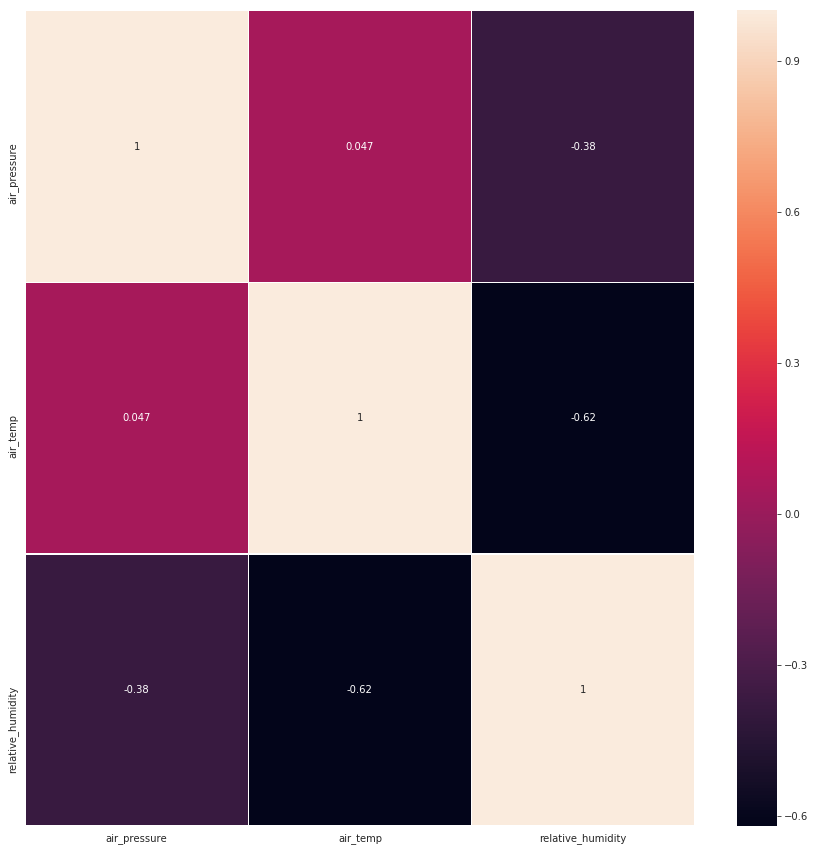

In [57]:
plt.figure(figsize = (15,15))
sns.heatmap(data[featurey].corr(),annot = True,linewidths = 0.5); #,cmap='cubehelix_r'
#plt.savefig('Correlation Heatmap.png')

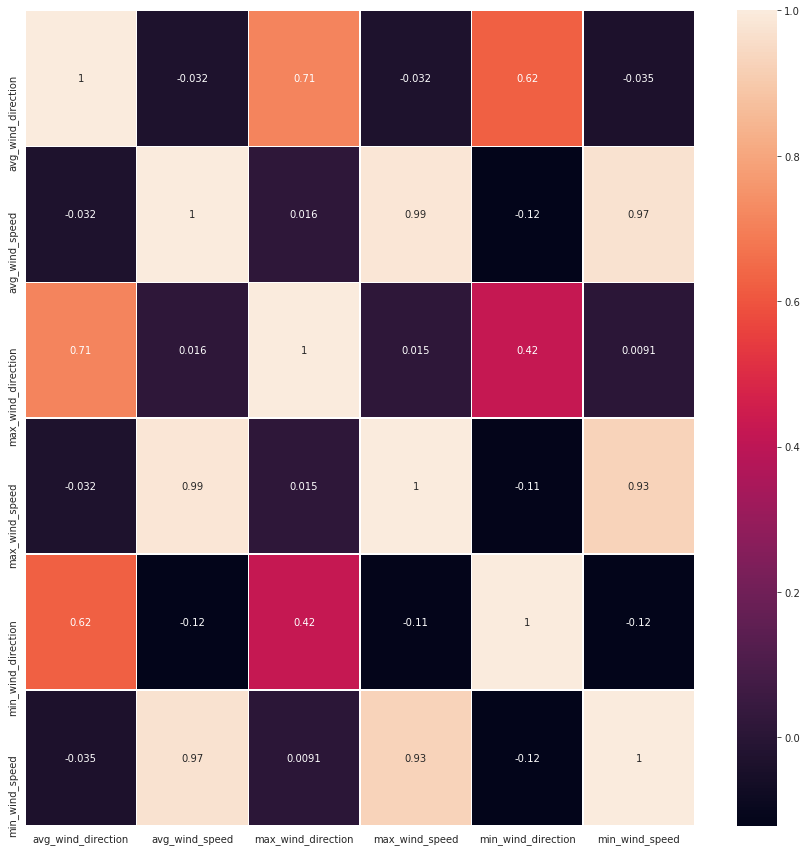

In [20]:
plt.figure(figsize = (15,15))
sns.heatmap(data[feature].corr(),annot = True,linewidths = 0.5); #,cmap='cubehelix_r'
#plt.savefig('Correlation Heatmap.png')

In [ ]:
sns.(data[feature]); #,cmap='cubehelix_r'
#plt.savefig('Correlation Heatmap.png')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


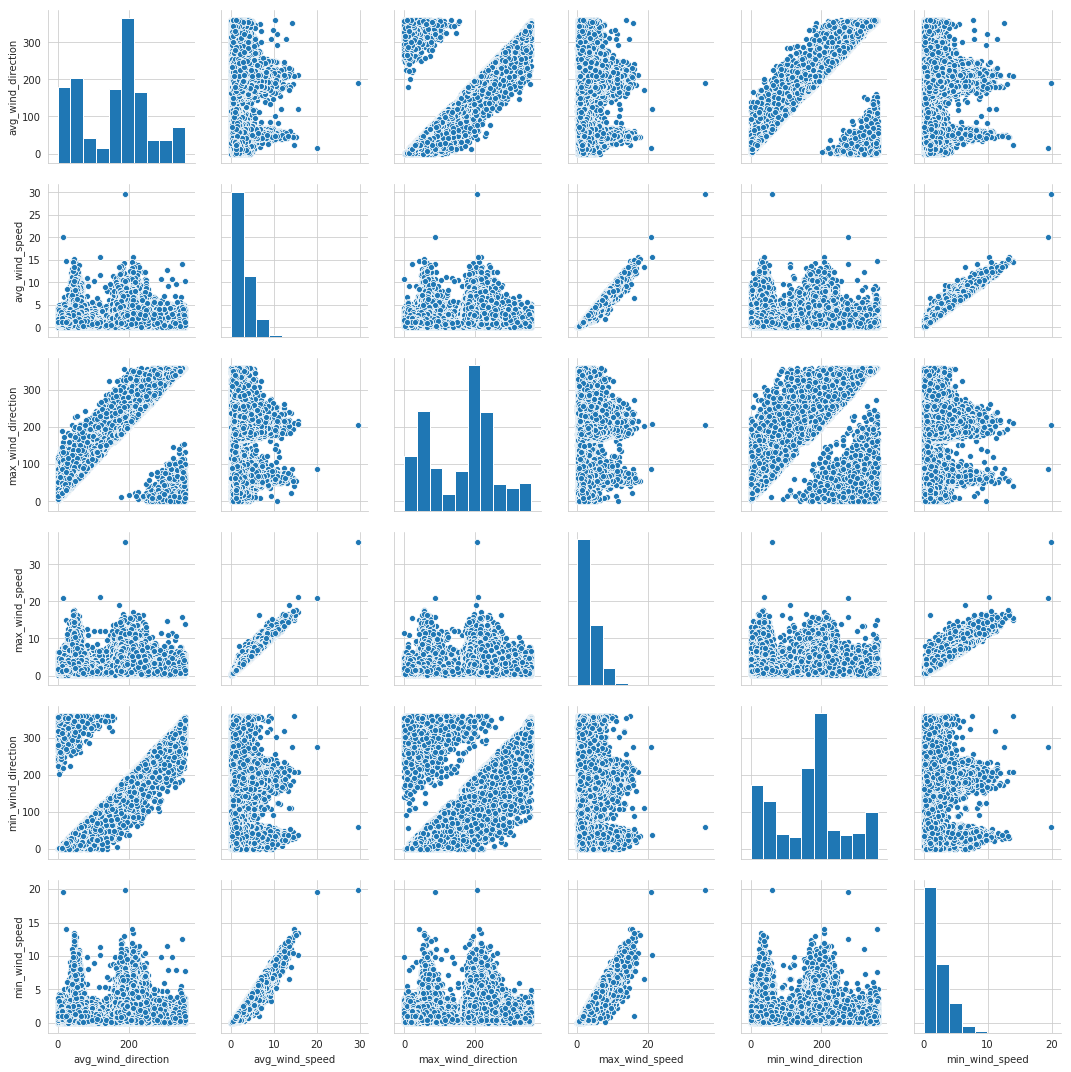

In [21]:
#'rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
   #    'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
   #    'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
   #    'rain_accumulation', 'rain_duration', 'relative_humidity'],
   #   dtype='object'
from scipy.stats import norm
#data['group'] = pd.Series(data, dtype="category")
sns.pairplot(data[feature])#, hue='avg_wind_speed', palette='hls'

In [ ]:

from scipy.stats import norm
plt.figure(figsize = (12,7))
sns.distplot(np.log(data[featurex]),fit = norm);
print('Skewness = ',np.log(train[featurex]).skew())

In [ ]:
cars_df = pd.DataFrame((data.ix[:,(4,5,6,7,8,9)].values), columns = ['avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',])
cars_target = data.ix[:,9].values
target_names = [0, 1]

cars_df['group'] = pd.Series(cars_target, dtype="category")
sns.pairplot(cars_df, hue='group', palette='hls')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq

In [65]:
data.corr()['air_temp'].sort_values(ascending=False)

air_temp              1.000000
rowID                 0.161663
air_pressure          0.046591
min_wind_direction    0.034800
avg_wind_direction   -0.017512
max_wind_direction   -0.046515
min_wind_speed       -0.199300
avg_wind_speed       -0.208942
max_wind_speed       -0.208998
relative_humidity    -0.620169
Name: air_temp, dtype: float64

In [63]:
x = data[featurex]
y = data[featurey]

In [ ]:
#y = data.air_temp
#data = pd.concat([y,data.iloc[:,10:20]],axis=1)
#data = pd.melt(data,id_vars="rain_duration ",
#                    var_name="air_temp",
#                    value_name='relative_humidity')
plt.figure(figsize=(10,10))
sns.swarmplot(data['air_temp'], data['relative_humidity'], hue="hpwren_timestamp", data=data)
plt.xticks(rotation=90)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


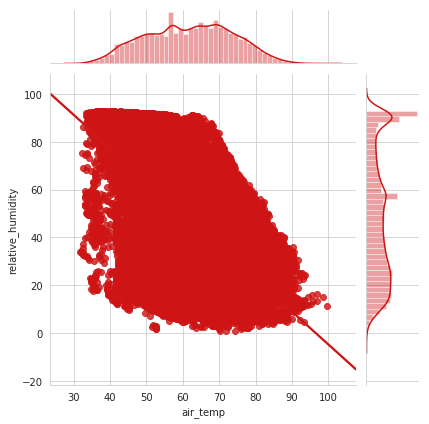

In [72]:
sns.jointplot(data['air_temp'], data['relative_humidity'], kind="regg", color="#ce1414")

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Drop all the Rows with Empty rain_duration and rain_accumulation
<br><br></p>


In [33]:
del data['rain_accumulation']
del data['rain_duration']

In [34]:
rows_before = data.shape[0]
sampled_df = data.dropna()
rows_after = data.shape[0]

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

How many rows did we drop ?
<br><br></p>


In [35]:
rows_before - rows_after

0

In [36]:
data.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Select Features of Interest for Clustering
<br><br></p>


In [37]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [38]:
data = data[features]

In [39]:
data.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [40]:
data.head()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


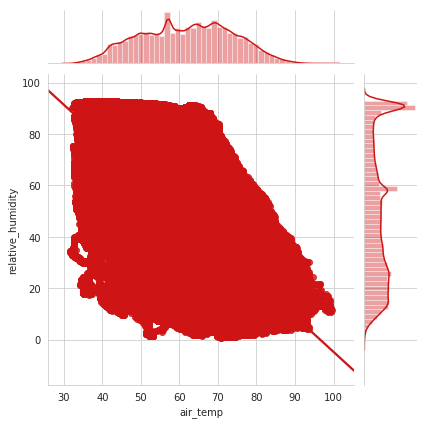

In [56]:
sns.jointplot(data['air_temp'], data['relative_humidity'], kind="regg", color="#ce1414")

In [ ]:
plt.figure(figsize = (10,7))
sns.regplot('avg_wind_speed','air_temp',data=data,color = 'red');

In [ ]:
plt.figure(figsize = (10,7))
sns.regplot('max_wind_direction','air_temp',data=data,color = 'red');

#relative_humidity

In [ ]:
train = data.drop(train[(train['relative_humidity']<0.5) & (train['air_temp']> )].index)
plt.figure(figsize = (10,7))
sns.regplot('GrLivArea','SalePrice',data=train,color = 'red');

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Scale the Features using StandardScaler
<br><br></p>


In [41]:
X = StandardScaler().fit_transform(data)
X

array([[-1.48446804,  0.24577707, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49173609],
       [-1.48446804,  0.0328229 , -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34749968],
       [-1.51723658,  0.12408897, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40781252],
       ...,
       [-0.30480037,  1.15843781,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01489759],
       [-0.30480037,  1.12801579,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04995245],
       [-0.30480037,  1.09759376, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05758186]])

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Use k-Means Clustering
<br><br></p>


In [42]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model\n", model)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

What are the centers of 12 clusters we formed ?
<br><br></p>


In [18]:
centers = model.cluster_centers_
centers

NameError: name 'model' is not defined

In [17]:
plt.figure(figsize = (10,7))
sns.regplot('avg_wind_direction','air_temp',data=centers,color = 'red');

NameError: name 'centers' is not defined

<Figure size 720x504 with 0 Axes>

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>

Plots
<br><br></p>


Let us first create some utility functions which will help us in plotting graphs:

In [22]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [41]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [37]:
P = pd_centers(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,-1.182469,-0.870480,0.446924,1.983056,0.538422,1.943974,0.908867,0
1,0.132601,0.840959,1.412396,-0.638195,1.676540,-0.588999,-0.713695,1
2,-0.837917,-1.201264,0.375532,0.369104,0.473993,0.357069,1.362472,2
3,1.367684,-0.081513,-1.206499,-0.051086,-1.075198,-0.030851,-0.977661,3
4,1.190073,-0.254681,-1.154934,2.122606,-1.053410,2.239355,-1.134564,4
5,-0.210580,0.632971,0.408559,0.733532,0.516729,0.671682,-0.151672,5
6,0.061130,-0.788915,-1.197306,-0.570783,-1.043320,-0.585367,0.879156,6
7,-0.163715,0.863403,-1.311270,-0.589557,-1.167109,-0.604845,-0.641254,7
8,0.244687,-0.996170,0.658014,-0.547224,0.847801,-0.529987,1.161491,8
9,0.234043,0.320619,1.887947,-0.651819,-1.551759,-0.576698,-0.283847,9


# Dry Days

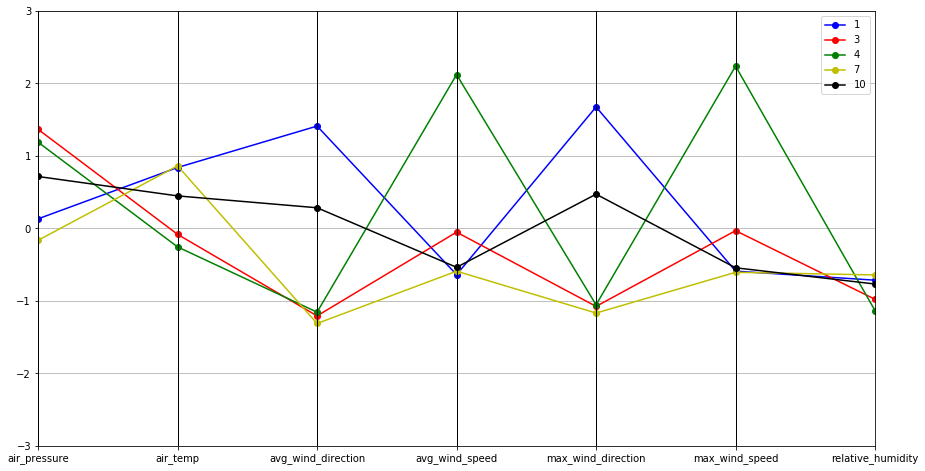

In [42]:
parallel_plot(P[P['relative_humidity'] < -0.5])

# Warm Days

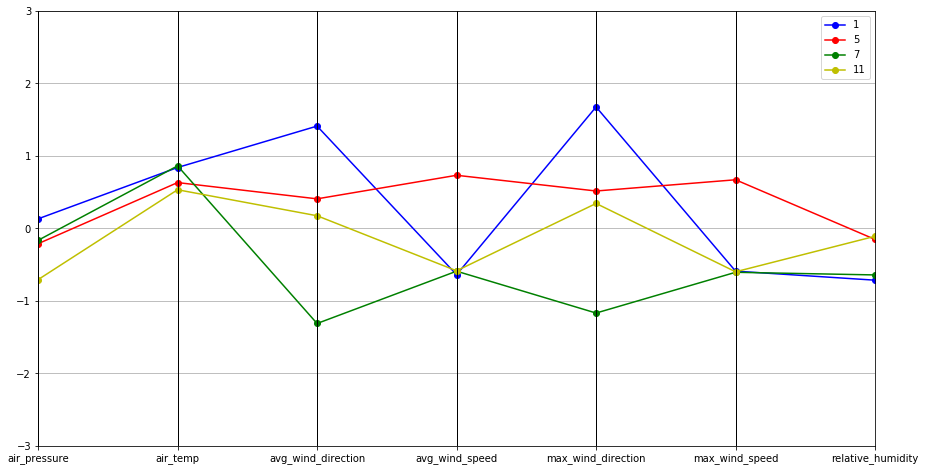

In [26]:
parallel_plot(P[P['air_temp'] > 0.5])

# Cool Days

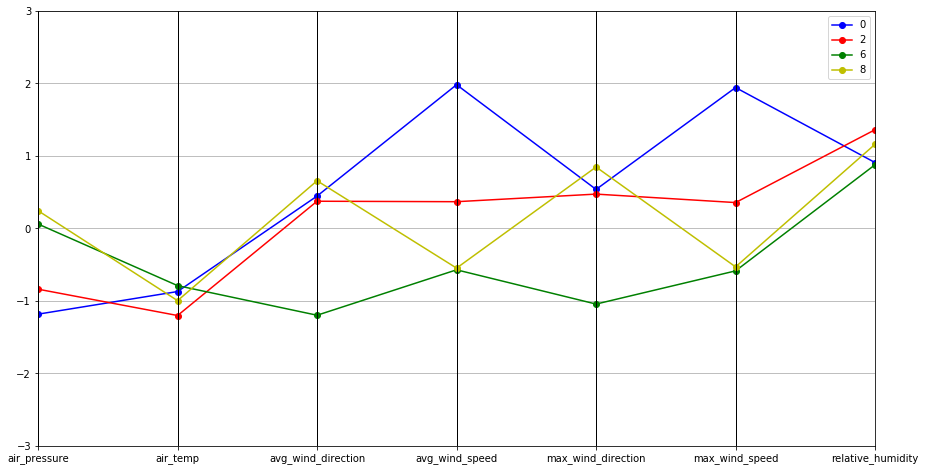

In [27]:
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])